In [39]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [67]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.arima.model import ARIMA


In [68]:
base = pd.read_csv("coin_Bitcoin.csv")

In [69]:
base.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [70]:
base.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11
2990,2991,Bitcoin,BTC,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11


In [71]:
base.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [72]:
#lendo o arquivo CSV
df = pd.read_csv('coin_Bitcoin.csv')

In [73]:
#converter a coluna 'Date' para datetime
df['Date'] = pd.to_datetime(df['Date'])

In [74]:
print(df.head())

   SNo     Name Symbol                Date        High         Low  \
0    1  Bitcoin    BTC 2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC 2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC 2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC 2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC 2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  


In [75]:
df.set_index('Date', inplace=True)

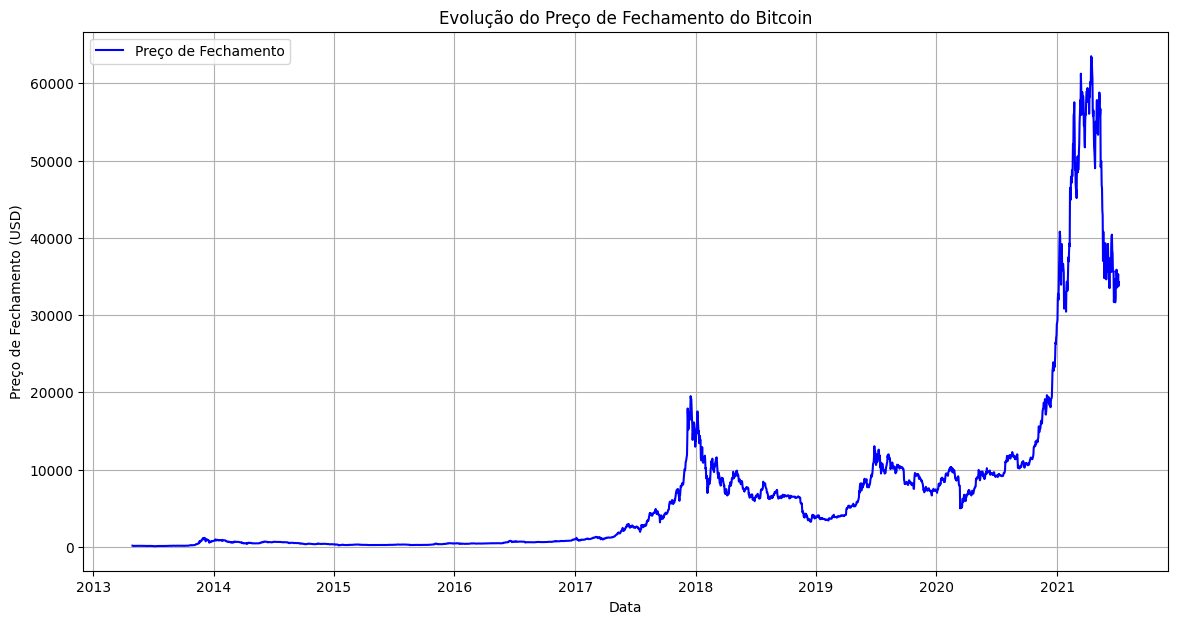

In [76]:
# Plotar a evolução dos preços de fechamento
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Preço de Fechamento', color='blue')
plt.title('Evolução do Preço de Fechamento do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()
plt.grid(True)
plt.show()

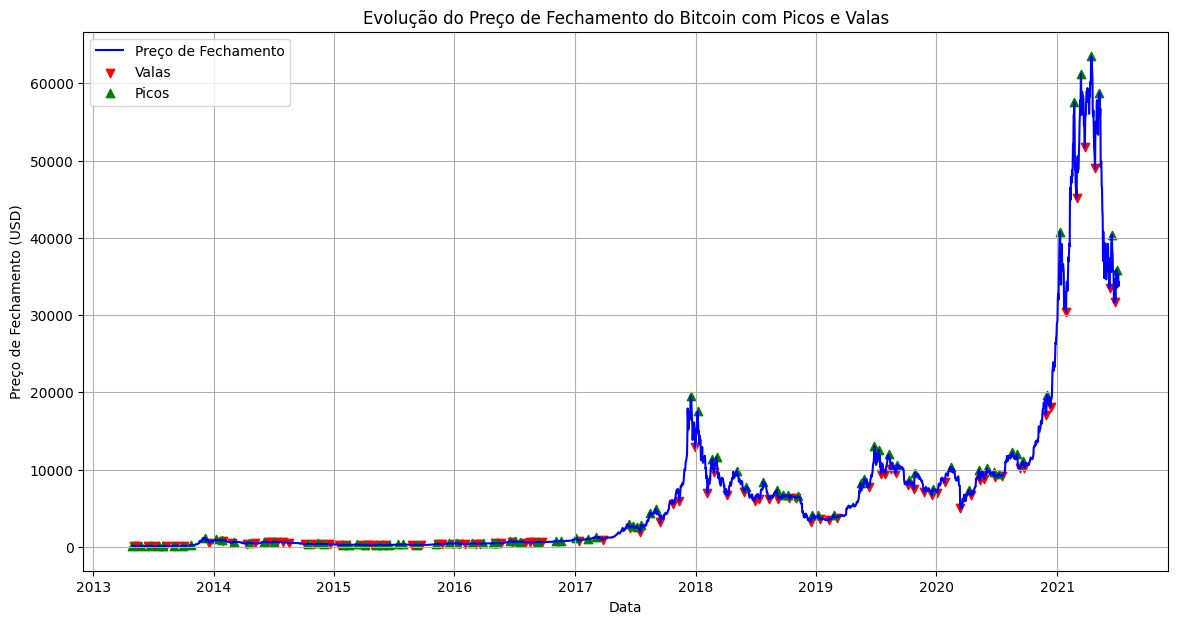

In [77]:
# Encontrar picos e valas
df['Min'] = df['Close'].iloc[argrelextrema(df['Close'].values, np.less_equal, order=10)[0]]
df['Max'] = df['Close'].iloc[argrelextrema(df['Close'].values, np.greater_equal, order=10)[0]]

# Plotar a evolução dos preços com picos e valas
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Preço de Fechamento', color='blue')
plt.scatter(df.index, df['Min'], color='red', label='Valas', marker='v')
plt.scatter(df.index, df['Max'], color='green', label='Picos', marker='^')
plt.title('Evolução do Preço de Fechamento do Bitcoin com Picos e Valas')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [78]:
# Verificar os nomes das colunas
print(df.columns)

# Limpar espaços em branco ao redor dos nomes das colunas
df.columns = df.columns.str.strip()

# Verificar novamente
print(df.columns)


Index(['SNo', 'Name', 'Symbol', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Marketcap', 'Min', 'Max'],
      dtype='object')
Index(['SNo', 'Name', 'Symbol', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Marketcap', 'Min', 'Max'],
      dtype='object')


In [79]:
# Verifique as primeiras linhas do DataFrame original
print(df.head())


                     SNo     Name Symbol        High         Low        Open  \
Date                                                                           
2013-04-29 23:59:59    1  Bitcoin    BTC  147.488007  134.000000  134.444000   
2013-04-30 23:59:59    2  Bitcoin    BTC  146.929993  134.050003  144.000000   
2013-05-01 23:59:59    3  Bitcoin    BTC  139.889999  107.720001  139.000000   
2013-05-02 23:59:59    4  Bitcoin    BTC  125.599998   92.281898  116.379997   
2013-05-03 23:59:59    5  Bitcoin    BTC  108.127998   79.099998  106.250000   

                          Close  Volume     Marketcap    Min         Max  
Date                                                                      
2013-04-29 23:59:59  144.539993     0.0  1.603769e+09    NaN  144.539993  
2013-04-30 23:59:59  139.000000     0.0  1.542813e+09    NaN         NaN  
2013-05-01 23:59:59  116.989998     0.0  1.298955e+09    NaN         NaN  
2013-05-02 23:59:59  105.209999     0.0  1.168517e+09    NaN    

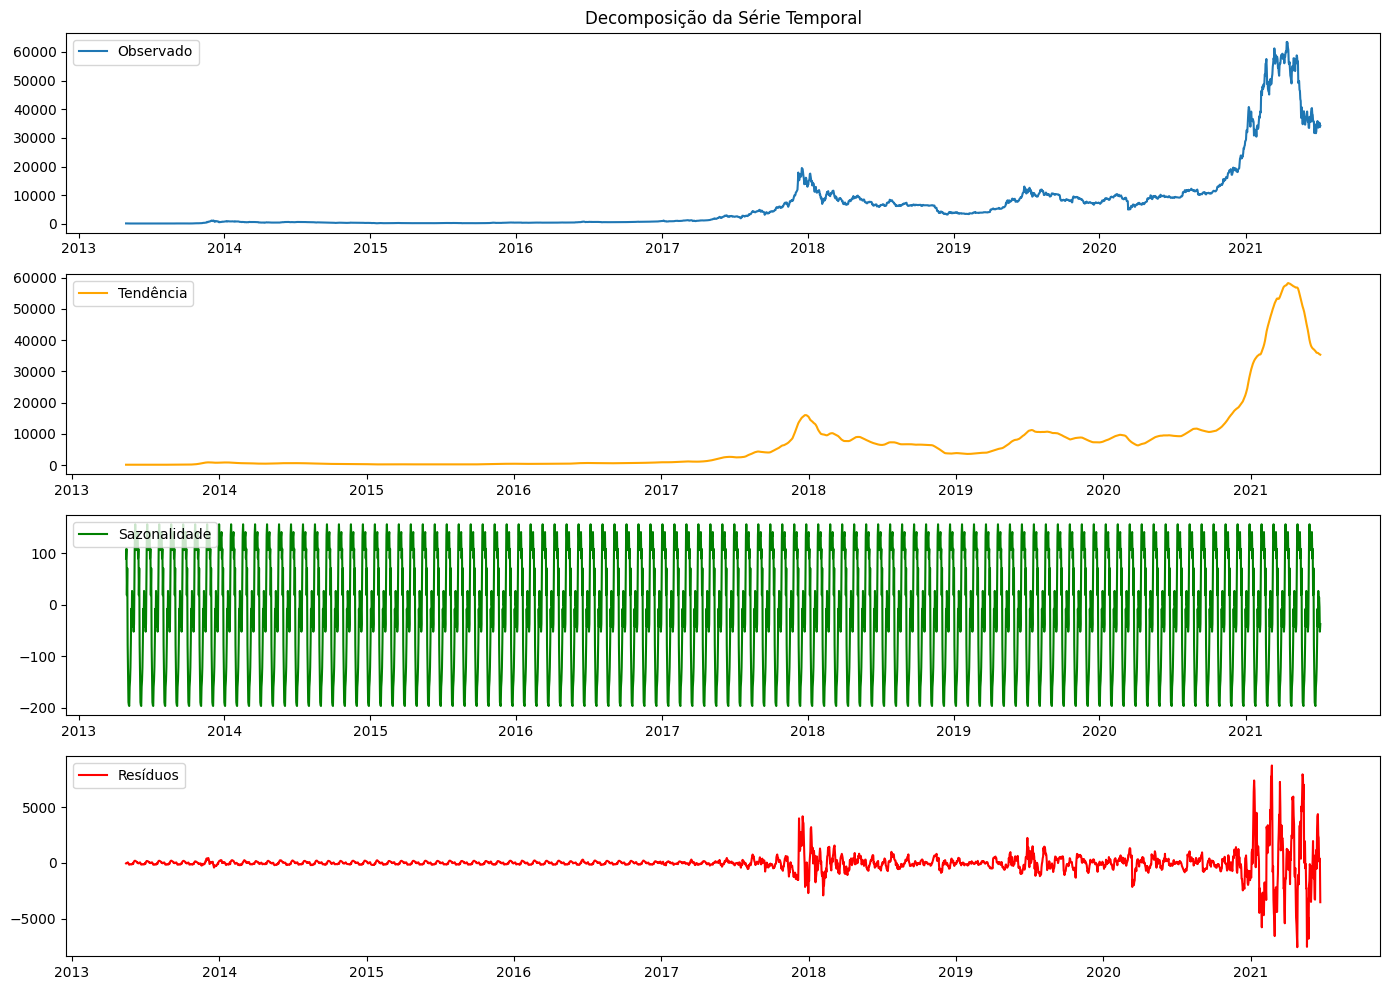

In [80]:
# Decompor a série temporal
result = seasonal_decompose(df['Close'].dropna(), model='additive', period=30)  # Ajuste o período conforme necessário

# Plotar a decomposição
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observado')
plt.legend(loc='upper left')
plt.title('Decomposição da Série Temporal')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendência', color='orange')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Resíduos', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [81]:
from statsmodels.tsa.stattools import adfuller

# Teste de Dickey-Fuller aumentado
result = adfuller(df['Close'].dropna())
print('Estatística do Teste:', result[0])
print('Valor p:', result[1])
print('Lags usados:', result[2])
print('Número de observações:', result[3])
print('Valores críticos:', result[4])


Estatística do Teste: -0.7973098451195629
Valor p: 0.8199110033239145
Lags usados: 29
Número de observações: 2961
Valores críticos: {'1%': np.float64(-3.4325603944919445), '5%': np.float64(-2.8625166073924957), '10%': np.float64(-2.567289874591689)}


In [85]:
# Converter o índice para datetime, se ainda não estiver
df.index = pd.to_datetime(df.index)

# Definir a frequência do índice
df = df.asfreq('D')  # Ajuste para 'W', 'M', etc., se necessário


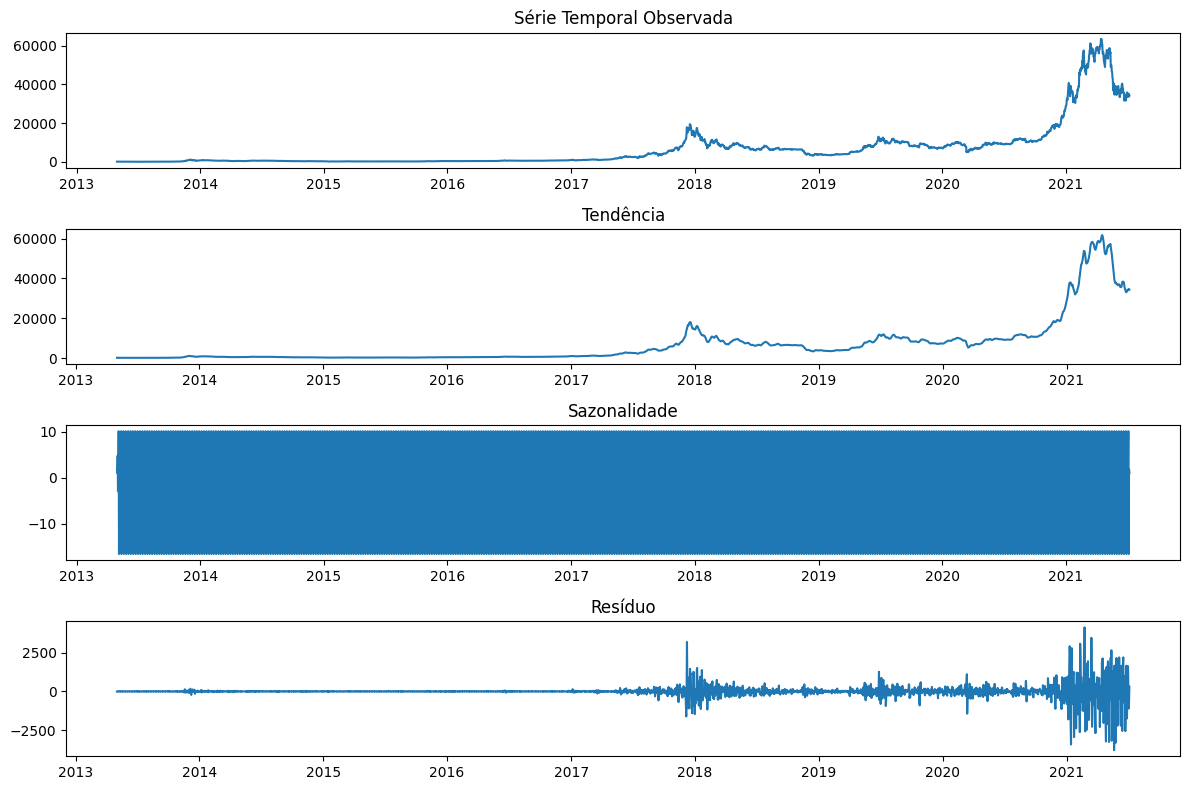

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2991
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -23292.299
Date:                Thu, 22 Aug 2024   AIC                          46596.597
Time:                        10:09:03   BIC                          46632.615
Sample:                    04-29-2013   HQIC                         46609.555
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0695      0.007    -10.168      0.000      -0.083      -0.056
ar.L2          0.0679      0.006     10.473      0.000       0.055       0.081
ar.L3          0.0397      0.007      5.957      0.0

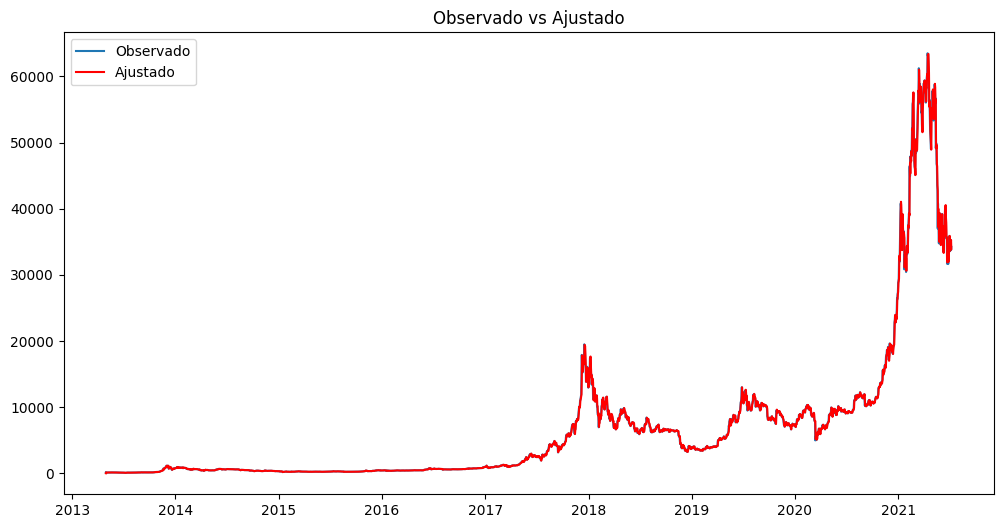

In [86]:
#df já está carregado e tem a série temporal
df.index = pd.to_datetime(df.index)  # Certifique-se de que o índice é uma data
df = df.asfreq('D')  # Ajuste para a frequência correta

# Decompor a série temporal para análise
decomposition = seasonal_decompose(df['Close'].dropna(), model='additive')
trend = decomposition.trend.dropna()
seasonal = decomposition.seasonal.dropna()
residual = decomposition.resid.dropna()

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df['Close'], label='Observado')
plt.title('Série Temporal Observada')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Tendência')
plt.title('Tendência')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Sazonalidade')
plt.title('Sazonalidade')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Resíduo')
plt.title('Resíduo')

plt.tight_layout()
plt.show()

# Ajustar o modelo ARIMA com a série temporal
model = ARIMA(df['Close'].dropna(), order=(5, 1, 0))  # Ajuste os parâmetros conforme necessário
model_fit = model.fit()

# Resumo do modelo
print(model_fit.summary())

# Plotar previsões
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Observado')
plt.plot(model_fit.fittedvalues, color='red', label='Ajustado')
plt.legend()
plt.title('Observado vs Ajustado')
plt.show()
